# 10 Approximate Inference

## 10.2. Illustration: Variational Mixture of Gaussians

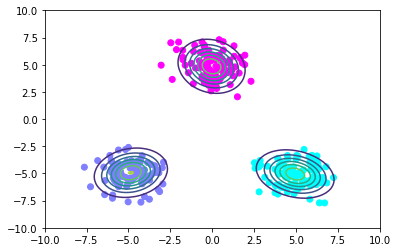

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pd import *


def make_blobs():
    cls1 = np.random.normal(size=(100, 2), loc=(-5,-5))
    cls2 = np.random.normal(size=(100, 2), loc=(5, -5))
    cls3 = np.random.normal(size=(100, 2), loc=(0, 5))
    return np.vstack((cls1, cls2, cls3))


# training & test data
X_train = make_blobs()
x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).T


''' variational reasoning '''
vbgm = BayesianGaussianMixture(n_components=10, alpha_0=0.01)
vbgm.fit(X_train)
Z = vbgm.predict(X_test)


plt.contour(x_test, y_test, Z.reshape(x_test.shape))
plt.scatter(X_train[:, 0], X_train[:, 1], cmap='cool', c=vbgm.classify(X_train))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

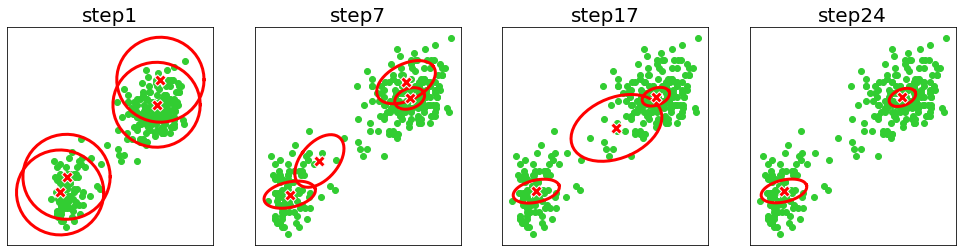

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from deepL_module.datasets import *
from pd import *



def unit_ring(ndiv = 50):# create unit circle
    theta = np.linspace(0, 2 * np.pi, ndiv)
    ring = np.array([np.cos(theta), np.sin(theta)]).T
    return ring


def calc_units(covs):
    (vals, vecs) = np.linalg.eig(covs)
    vals = np.sqrt(vals)
    return vals[:, None].transpose(0, 2, 1) * vecs


def ellipse_draw(ax, mu, var):
    num_class = var.shape[0]
    rbuf = unit_ring() @ calc_units(var) # coordinate trans.
    for k in range(num_class):
        ax.plot(rbuf[k][:, 0] + mu[k, 0], rbuf[k][:, 1] + mu[k, 1], 'r', linewidth=3)



# training data & test data
X_train = load_faithful(normalize=True)
x_test, y_test = np.meshgrid(np.linspace(0, 6, 100), np.linspace(0, 100, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).T


''' Variational Gaussian Mixture '''
model = BayesianGaussianMixture(n_components=4, alpha_0=1e-2)
model.fit(X_train, n_iter=100)
labels = model.classify(X_train)
Z = model.predict(X_test)



fig = plt.figure(figsize=(17,4))
keys = list(model.eff_means.keys())
n_step = len(keys)
keys = [keys[0], keys[n_step // 4], keys[2 * n_step // 3], keys[-1]]
for n, key in enumerate(keys):
    ax_ = fig.add_subplot(1, len(keys), n+1)
    ax_.scatter(*X_train.T, c='limegreen')
    ax_.scatter(*model.eff_means[key].T, s=130, marker='X', lw=1, c='r', edgecolor="white", zorder=3)
    ellipse_draw(ax_, model.eff_means[key], model.eff_covs[key])
    ax_.set_title(str(key), fontsize=20)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.tick_params(bottom=False, left=False)
plt.show()